In [1]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%pylab --no-import-all inline

import pandas as pd

import plotly
import plotly.graph_objs as go
# mode offline
plotly.offline.init_notebook_mode()

import scipy as sp
from scipy.interpolate import SmoothBivariateSpline

Populating the interactive namespace from numpy and matplotlib


# Load datas

In [2]:
fdata = "../../dev/ternaire/miel.csv"
df = pd.DataFrame.from_csv(fdata, sep=";")
df

,glucose,fructose,eau,mtot,xgluc,xfruct,xeau,n,alpha
Pilulier,,,,,,,,,
1,5.9997,6.0304,7.9980,20.0281,29.956411,30.109696,39.933893,1.4360,-44.38
2,6.9987,6.0199,6.9924,20.0110,34.974264,30.082954,34.942781,1.4485,-35.95
3,7.9946,6.0034,6.0601,20.0581,39.857215,29.930053,30.212732,1.4580,-28.17
4,8.9978,6.0620,5.0422,20.1020,44.760720,30.156203,25.083076,1.4715,-19.02
5,10.0011,6.0389,4.0300,20.0700,49.831091,30.089188,20.079721,1.4880,-6.83
6,6.0066,6.9946,7.0827,20.0839,29.907538,34.826901,35.265561,1.4475,-62.65
7,6.9945,7.0864,6.0424,20.1233,34.758216,35.214900,30.026884,1.4600,-59.32
8,8.0343,6.9936,5.0526,20.0805,40.010458,34.827818,25.161724,1.4740,-48.35
9,9.0592,7.0469,4.0465,20.1526,44.953009,34.967696,20.079295,1.4880,-40.05


# 3D plot

## Indice de réfraction

In [3]:
trace = go.Scatter3d(
    x=df.xfruct,
    y=df.xgluc,
    z=df.n,
    mode='markers',
    marker=go.Marker(
        color=df.n,
        colorscale="Viridis",
        colorbar=dict(title="n")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Indice de refraction', 
    scene=dict(
        xaxis=dict(title="x_m(fructose)"),
        yaxis=dict(title="x_m(glucose)"),
        zaxis=dict(title="n")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

## Pouvoir rotatoire

In [4]:
trace = go.Scatter3d(
    x=df.xfruct,
    y=df.xgluc,
    z=df.alpha,
    mode='markers',
    marker=go.Marker(
        color=df.alpha,
        colorscale="Viridis",
        colorbar=dict(title="alpha")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Pouvoir rotatoire', 
    scene=dict(
        xaxis=dict(title="x_m(fructose)"),
        yaxis=dict(title="x_m(glucose)"),
        zaxis=dict(title="alpha")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# Ternary plot

Tout frais de la dernière version, ça date de fin avril.

## Indice de réfraction

In [5]:
trace = go.Scatterternary(
    a=df.xfruct,
    b=df.xgluc,
    mode='markers',
    marker=go.Marker(
        size=20,
        color=df.n,
        colorscale="Viridis",
        colorbar=dict(title="n")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Indice de refraction', 
    ternary=dict(
        sum=100,
        aaxis=dict(title="x_m(fructose)"),
        baxis=dict(title="x_m(glucose)"),
        caxis=dict(title="x_m(eau)")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

## Pouvoir rotatoire

In [6]:
trace = go.Scatterternary(
    a=df.xfruct,
    b=df.xgluc,
    mode='markers',
    marker=go.Marker(
        size=20,
        color=df.alpha,
        colorscale="Viridis",
        colorbar=dict(title="alpha")
    )
)
data=[trace]
layout=go.Layout(
    height=800, 
    width=800, 
    title='Pouvoir rotatoire', 
    ternary=dict(
        sum=100,
        aaxis=dict(title="x_m(fructose)"),
        baxis=dict(title="x_m(glucose)"),
        caxis=dict(title="x_m(eau)")
    ),
)
fig=go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# Contours

In [7]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

residus n =  1.44624900389e-05
residus alpha =  29.292775782421568


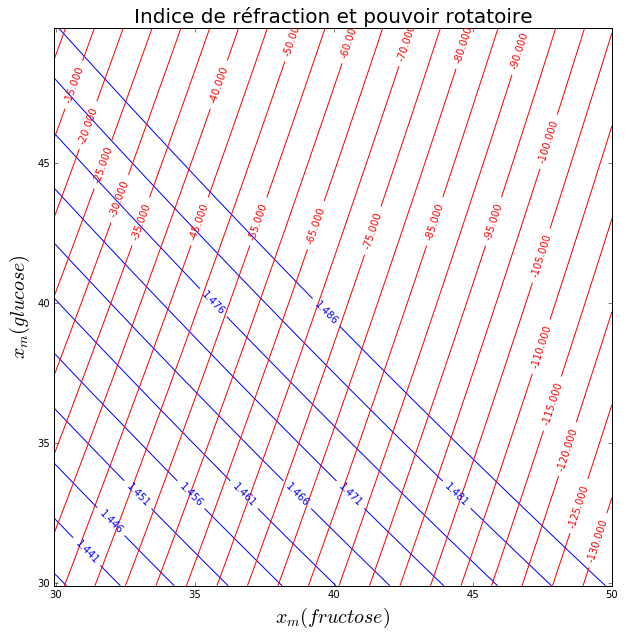

In [8]:
# set up the grid
nptsx, nptsy = 50, 50
xn, yn = sp.mgrid[df.xfruct.min():df.xfruct.max():nptsx * 1j,
                  df.xgluc.min():df.xgluc.max():nptsy * 1j]

# fit surface for n
nspl = SmoothBivariateSpline(df.xfruct, df.xgluc, df.n, kx=1, ky=1)
print("residus n = ", nspl.get_residual() / df.n.mean())
nspline = nspl(xn[:, 0], yn[0, :])

# fit surface for alpha
aspl = SmoothBivariateSpline(df.xfruct, df.xgluc, df.alpha, kx=1, ky=1, s=30)
print("residus alpha = ", aspl.get_residual())
aspline = aspl(xn[:, 0], yn[0, :])

# figure set up
fig = plt.figure(figsize=(10, 10))
plt.grid(False)

# contours for n
levels = sp.arange(df.n.min(), df.n.max(), 0.005)
nCS = plt.contour(xn, yn, nspline, levels=levels, colors="b")
plt.clabel(nCS, inline=1, fontsize=10)

# contours for alpha
alevels = sp.arange(-130, df.alpha.max(), 5)
aCS = plt.contour(xn, yn, aspline, levels=alevels, colors="r")
plt.clabel(aCS, inline=1, fontsize=10)

font = {'size': 20}
plt.title("Indice de réfraction et pouvoir rotatoire", **font)
plt.xlabel(r"$x_m(fructose)$", **font)
plt.ylabel(r"$x_m(glucose)$", **font)